<font face='Calibri' size='2'> <i>eSBAE - Notebook Series - Part 5a, version 0.1, April 2023. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![titre](images/header.png)

# V-a - Sous-échantillonnage non supervisé
### Exécutez un algorithme de clustering non supervisé KMeans pour obtenir un premier ensemble de données d'entraînement *"statistiquement équilibrées"*
-------

Ce bloc-notes vous guide tout au long du processus de regroupement de vos points de données de manière non supervisée. À partir de là, vous pouvez sélectionner un sous-échantillon, qui peut servir de base pour l'annotation. Les données sont exportées sous forme de fichier compatible CEO.

La raison pour laquelle nous utilisons KMeans sur une simple sélection aléatoire est que nous voulons capturer de manière surproportionnée des classes rares. Par exemple, l'un des clusters représente des événements de changement, mais le cluster lui-même ne comprend que 1 % de tous les échantillons. Dans une sélection aléatoire de 100 points, seulement 1 point serait sélectionné. Si nous choisissons 10 grappes et échantillonnons 10 points dans chaque grappe, nous nous assurons que 10 % des échantillons sont réellement modifiés. Ceci est bénéfique pour les étapes ultérieures de classification, car nous avons besoin d'une quantité suffisante d'échantillons pour nos rares classes de changement.

Le nombre de clusters est une approche itérative. Les diagrammes statistiques aideront à voir si un cluster pourrait réellement capturer le changement de la forêt de manière prédominante. Le nombre de points par cluster est déterminé par la quantité globale d'échantillons que l'on est capable d'interpréter ultérieurement.

### 1 - Importer des bibliothèques (*exécuter uniquement cette cellule*)

Cette cellule nous fournira les fonctionnalités dont nous avons besoin pour exécuter les cellules suivantes du notebook.

In [1]:
from sampling_handler import KMeansSubSampling

/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.8/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


### 2 - Variables d'entrée de base

Ici, une soi-disant instance de classe est initialisée. L'instance de classe nécessite la définition de certains paramètres et est écrite dans la variable *esbae*. Voir les lignes commentées pour plus d'explications.

In [2]:
esbae = KMeansSubSampling(

    # your project name (NEEDS to be consistent with previous notebooks of your project)
    project_name = 'esbae_congo',
    
    # select the number of clusters (reasonable numbers range from 5 to 30)
    clusters=10,
    
    # select the points per cluster (multiplied by the number fo cluster, will give you the overall number of samples ou will get)
    points_per_cluster=100,
    
    # a random state for reproducability (can be any integer number)
    random_state=25
)

INFO: Using existing project directory at /home/sepal-user/module_results/esbae/esbae_congo
INFO: Using existent config file from project directory /home/sepal-user/module_results/esbae/esbae_congo


### 3 - Exécutez l'algorithme de clustering

L'algorithme de cluster doit être exécuté avec des entrées normalisées (par exemple, toutes les variables d'entrée sont normalisées dans la même plage). Cependant, dans certains cas, des entrées non standardisées peuvent donner de meilleurs résultats. 

INFO: Aggregating files from data augmentation step
INFO: Using the following attributes as input for KMeans:
INFO: ['gfc_tc00', 'mon_images', 'bfast_magnitude', 'bfast_means', 'cusum_confidence', 'cusum_magnitude', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'red_mean', 'red_sd', 'red_min', 'red_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_magnitude', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', '

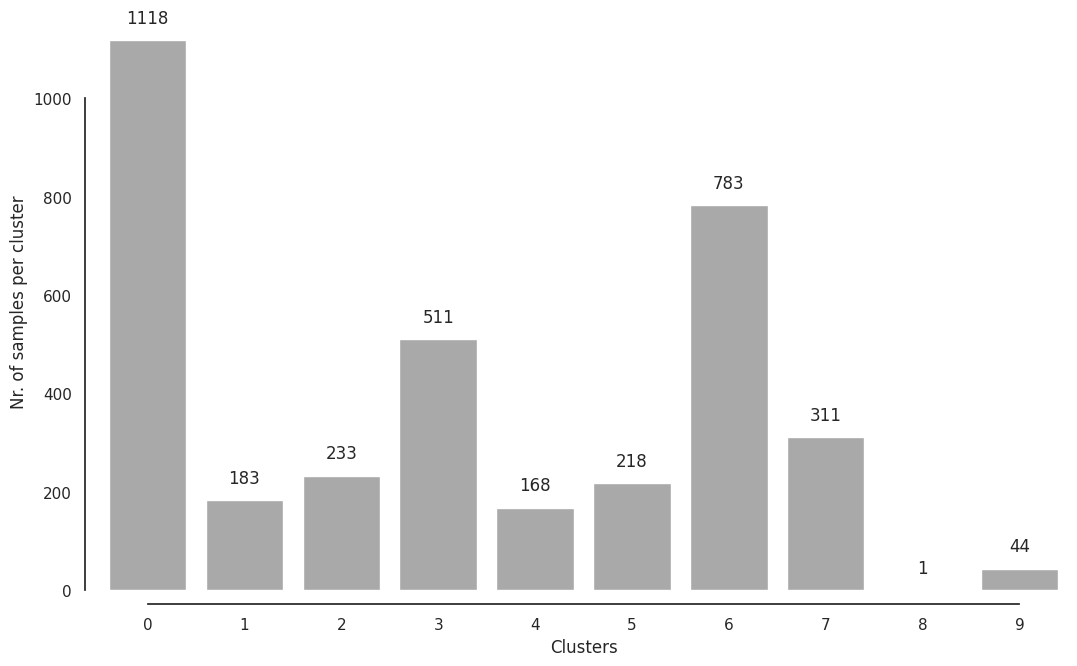

In [3]:
esbae.cluster(standardize_inputs=True)

### 4 - Tracer les clusters sur une carte

In [1]:
import contextily as cx
esbae.plot_clusters(markersize=0.25, basemap=cx.providers.Esri.WorldImagery) #check other basemaps here: https://contextily.readthedocs.io/en/latest/intro_guide.html

### 5 - Tracez les clusters par rapport aux variables d'entrée pour avoir une idée de ce qu'ils représentent

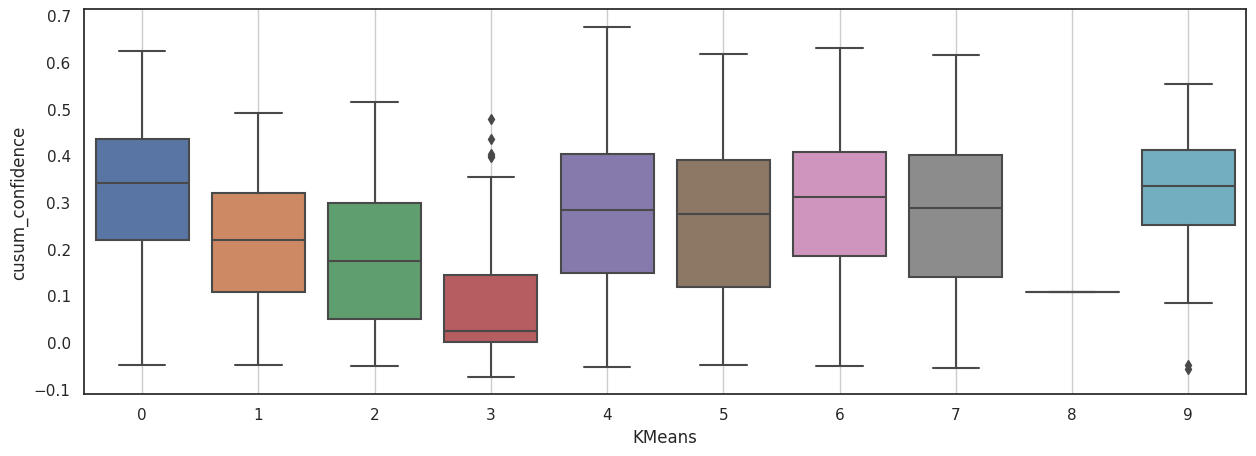

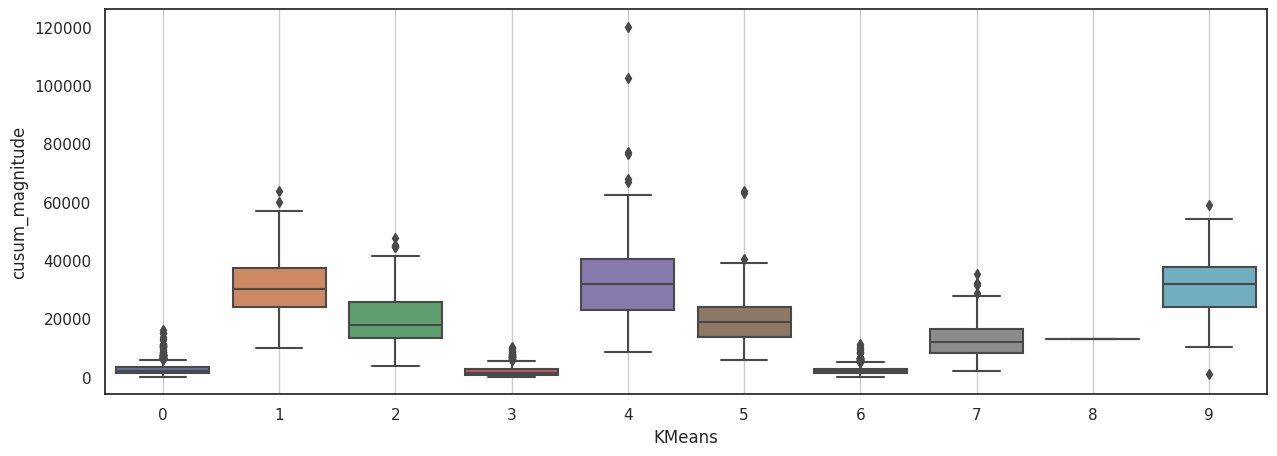

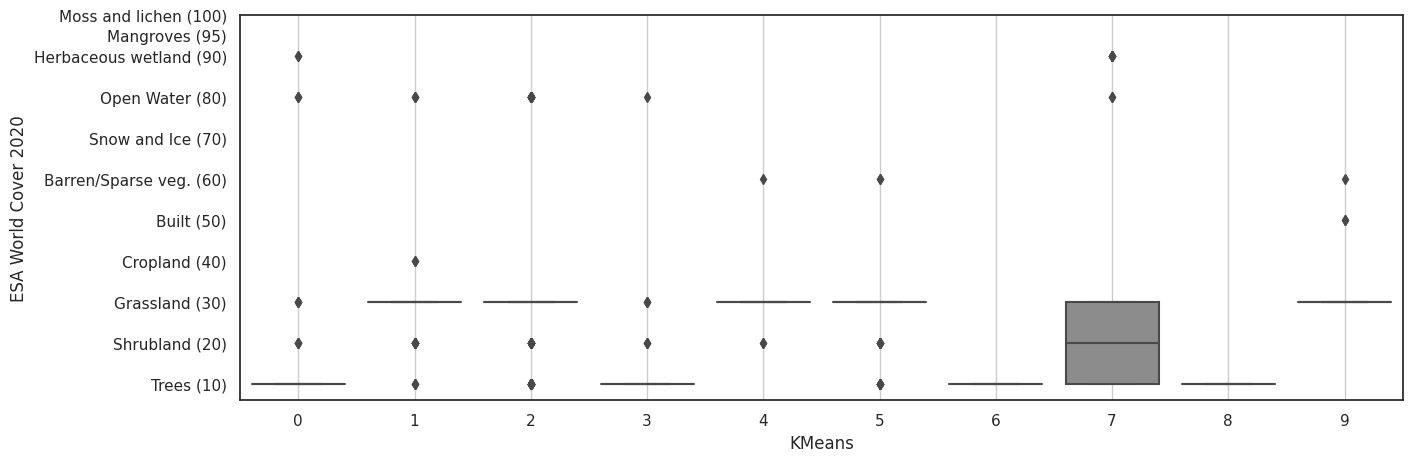

In [5]:
esbae.plot_stats(class_column='KMeans', cols_to_plot=['cusum_confidence', 'cusum_magnitude', 'esa_lc20'])

### 6 - Sous-échantillonnage

Cette étape sous-échantillonne chaque cluster en fonction du nombre de points par cluster défini lors de l'étape d'initialisation dans la cellule 2. Il existe 2 façons de sélectionner le sous-ensemble, l'une est *au hasard* et l'autre utilise une *courbe de remplissage d'espace* basée sur la distance de Hilbert .

La sortie peut être enregistrée en tant que PDG. Un fichier csv avec les coordonnées des points est créé. De plus, un fichier de formes compressé est également créé. Dans le cas où dans Notebook 3, l'option bounds_reduce a été utilisée, les polygones du réducteur sont pris comme géométrie.

In [6]:
esbae.sampling_type = 'space_filling_curve'  # or 'random'
esbae.select_samples(save_as_ceo=True)

INFO: 845 samples have been selected in total
INFO: Saving CEO compatible zipped shapefile samples to /home/sepal-user/module_results/esbae/esbae_congo/05a_Unsupervised_subsampling/samples.zip
INFO: Saving CEO compatible file of sample centroids to /home/sepal-user/module_results/esbae/esbae_congo/05a_Unsupervised_subsampling/samples.csv


### 7 - Tracer la sélection du sous-échantillon sur une carte

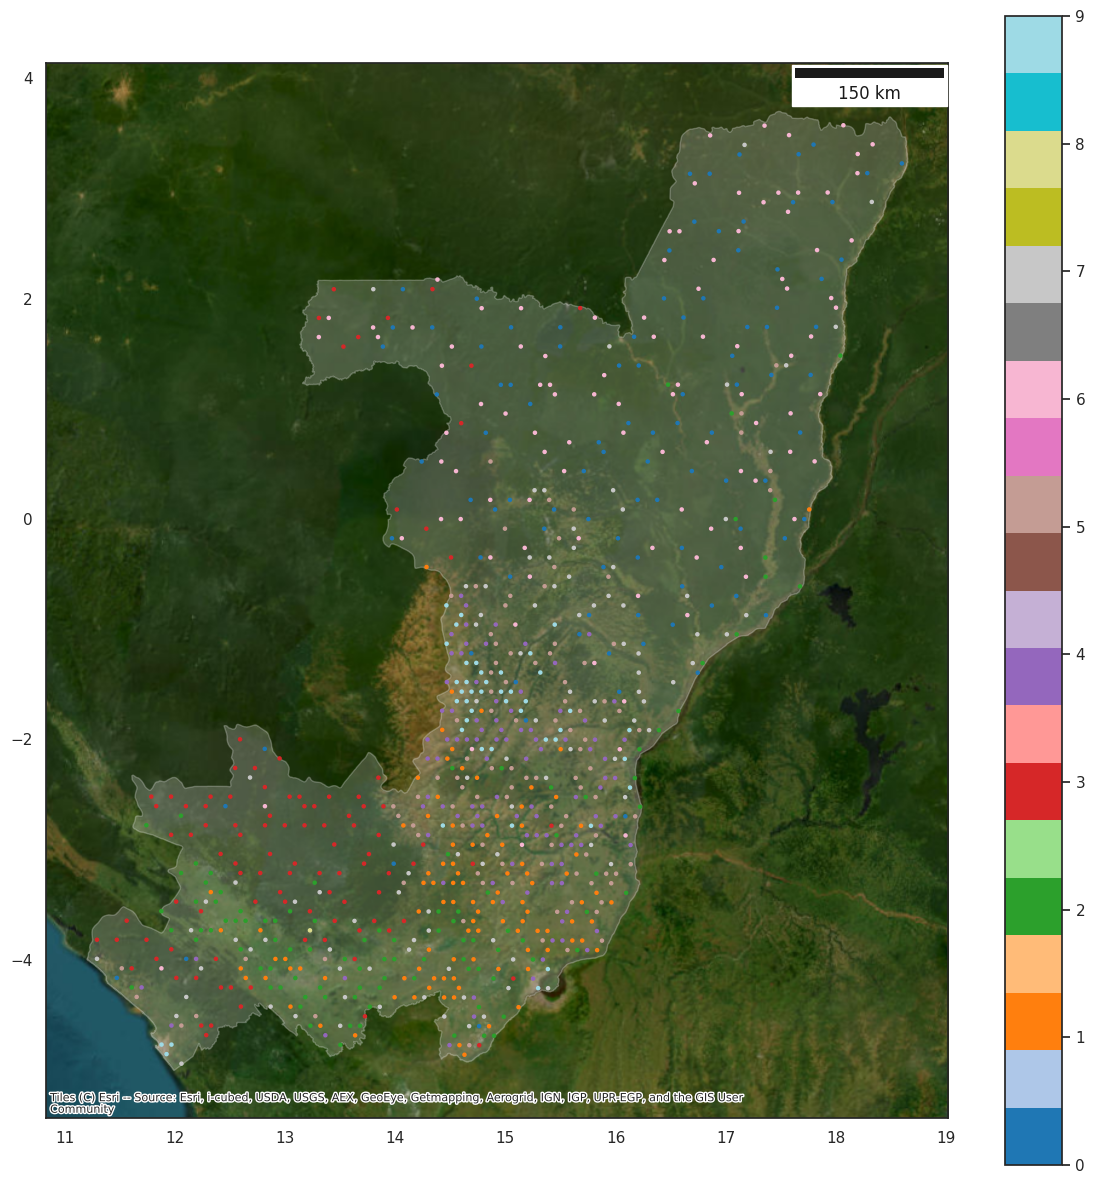

In [7]:
esbae.plot_samples(markersize=5, basemap=cx.providers.Esri.WorldImagery)